<a href="https://colab.research.google.com/github/KruthigaKarunakaran/Deep-Learning-and-Neural-Network/blob/master/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

N = 1000    
Tp = 800
t=np.arange(0,N) # Generate number between 0 and N
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.653418
1,1.403592
2,0.771732
3,1.540142
4,1.992694


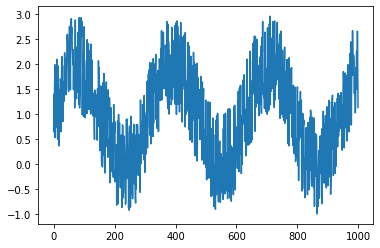

In [10]:
plt.plot(df)
plt.show() 

In [16]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]
step = 4
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape
(800, 1, 4) 

(800, 1, 4)

In [17]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)




Epoch 1/100





 - 1s - loss: 0.6995
Epoch 2/100
 - 0s - loss: 0.4188
Epoch 3/100
 - 0s - loss: 0.4071
Epoch 4/100
 - 0s - loss: 0.3988
Epoch 5/100
 - 0s - loss: 0.3971
Epoch 6/100
 - 0s - loss: 0.3927
Epoch 7/100
 - 0s - loss: 0.3953
Epoch 8/100
 - 0s - loss: 0.3925
Epoch 9/100
 - 0s - loss: 0.3926
Epoch 10/100
 - 0s - loss: 0.3913
Epoch 11/100
 - 0s - loss: 0.3879
Epoch 12/100
 - 0s - loss: 0.3895
Epoch 13/100
 - 0s - loss: 0.3892
Epoch 14/100
 - 0s - loss: 0.3882
Epoch 15/100
 - 0s - loss: 0.3860
Epoch 16/100
 - 0s - loss: 0.3862
Epoch 17/100
 - 0s - loss: 0.3850
Epoch 18/100
 - 0s - loss: 0.3861
Epoch 19/100
 - 0s - loss: 0.3856
Epoch 20/100
 - 0s - loss: 0.3846
Epoch 21/100
 - 0s - loss: 0.3856
Epoch 22/100
 - 0s - loss: 0.3839
Epoch 23/100
 - 0s - loss: 0.3846
Epoch 24/100
 - 0s - loss: 0.3823
Epoch 25/100
 - 0s - loss: 0.3812
Epoch 26/100
 - 0s - loss: 0.3843
Epoch 27/100
 - 0s - loss: 0.3812
Epoch 28/100
 - 0s - loss: 0.3791
Epoch 29/100
 - 0s - loss: 0.3810
Epoch 30/100
 -

In [19]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.36719895362854005


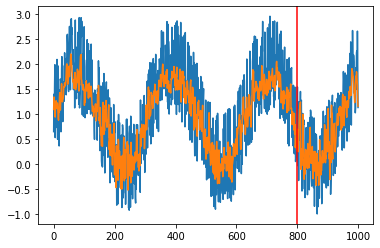

In [20]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()